In [ ]:
# web scraping gets data from a web page in a format that we can work with
import requests
web_page = requests.get('http://dataquestio.github.io/web-scraping-pages/simple.html')
print(web_page)
print(web_page.status_code)
# a status code that starts with 2 is supposedly successful

<Response [200]>
200


In [ ]:
# prints the HTML script
web_page.content

b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'

In [ ]:
# using BeautifulSoup library to parse data
from bs4 import BeautifulSoup

In [ ]:
soupified = BeautifulSoup(web_page.content,'html.parser')
soupified

<!DOCTYPE html>

<html>
<head>
<title>A simple example page</title>
</head>
<body>
<p>Here is some simple content for this page.</p>
</body>
</html>

In [ ]:
list(soupified.children)

['html', '\n', <html>
 <head>
 <title>A simple example page</title>
 </head>
 <body>
 <p>Here is some simple content for this page.</p>
 </body>
 </html>]

In [ ]:
for item in list(soupified.children):
    print(type(item))

<class 'bs4.element.Doctype'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>


In [ ]:
# you have to index it since the find_all function creates a list
soupified.find_all('p')[0].get_text()

'Here is some simple content for this page.'

In [ ]:
web_page_2 = requests.get('http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html')
soupified_2 = BeautifulSoup(web_page_2.content, 'html.parser')
soupified_2

<html>
<head>
<title>A simple example page</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                First paragraph.
            </p>
<p class="inner-text">
                Second paragraph.
            </p>
</div>
<p class="outer-text first-item" id="second">
<b>
                First outer paragraph.
            </b>
</p>
<p class="outer-text">
<b>
                Second outer paragraph.
            </b>
</p>
</body>
</html>

In [ ]:
soupified.find_all('title')[0].get_text()

'A simple example page'

In [ ]:
weather = requests.get('https://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168#.XKTv7PZFwdU')
weather_page = BeautifulSoup(weather.content,'html.parser')
days = weather_page.find(id='seven-day-forecast')
days

<div class="panel panel-default" id="seven-day-forecast">
<div class="panel-heading">
<b>Extended Forecast for</b>
<h2 class="panel-title">
	    	    San Francisco CA	</h2>
</div>
<div class="panel-body" id="seven-day-forecast-body">
<div id="seven-day-forecast-container"><ul class="list-unstyled" id="seven-day-forecast-list"><li class="forecast-tombstone">
<div class="tombstone-container">
<p class="period-name">Tonight<br/><br/></p>
<p><img alt="Tonight: A 30 percent chance of showers before 11pm.  Cloudy during the early evening, then gradual clearing, with a low around 53. West northwest wind 16 to 18 mph, with gusts as high as 23 mph.  New precipitation amounts of less than a tenth of an inch possible. " class="forecast-icon" src="DualImage.php?i=nshra&amp;j=nbkn&amp;ip=30" title="Tonight: A 30 percent chance of showers before 11pm.  Cloudy during the early evening, then gradual clearing, with a low around 53. West northwest wind 16 to 18 mph, with gusts as high as 23 mph.  New pr

In [ ]:
forecast = weather_page.find_all(class_="tombstone-container")
Tonight = forecast[0]
Tonight

<div class="tombstone-container">
<p class="period-name">Tonight<br/><br/></p>
<p><img alt="Tonight: A 30 percent chance of showers before 11pm.  Cloudy during the early evening, then gradual clearing, with a low around 53. West northwest wind 16 to 18 mph, with gusts as high as 23 mph.  New precipitation amounts of less than a tenth of an inch possible. " class="forecast-icon" src="DualImage.php?i=nshra&amp;j=nbkn&amp;ip=30" title="Tonight: A 30 percent chance of showers before 11pm.  Cloudy during the early evening, then gradual clearing, with a low around 53. West northwest wind 16 to 18 mph, with gusts as high as 23 mph.  New precipitation amounts of less than a tenth of an inch possible. "/></p><p class="short-desc">Chance<br/>Showers then<br/>Mostly Cloudy</p><p class="temp temp-low">Low: 53 °F</p></div>

In [ ]:
# can't apply get_text function to prettified version of script
Day = Tonight.find(class_="period-name").get_text()
Day

'Tonight'

In [ ]:
img = Tonight.find("img")
img['alt']

'Tonight: A 30 percent chance of showers before 11pm.  Cloudy during the early evening, then gradual clearing, with a low around 53. West northwest wind 16 to 18 mph, with gusts as high as 23 mph.  New precipitation amounts of less than a tenth of an inch possible. '

In [ ]:
# prints the period name of everything with the tombstone container class
period_tags = days.select(".tombstone-container .period-name")
period_tags 

[<p class="period-name">Tonight<br/><br/></p>,
 <p class="period-name">Tuesday<br/><br/></p>,
 <p class="period-name">Tuesday<br/>Night</p>,
 <p class="period-name">Wednesday<br/><br/></p>,
 <p class="period-name">Wednesday<br/>Night</p>,
 <p class="period-name">Thursday<br/><br/></p>,
 <p class="period-name">Thursday<br/>Night</p>,
 <p class="period-name">Friday<br/><br/></p>,
 <p class="period-name">Friday<br/>Night</p>]

In [ ]:
def lister(list_param):
    new_list = []
    for i in len(list_param):
        new_list.append(list_param[i].get_text())
    return new_list
lister(period_tags)

['Tonight',
 'Tuesday',
 'TuesdayNight',
 'Wednesday',
 'WednesdayNight',
 'Thursday',
 'ThursdayNight',
 'Friday',
 'FridayNight']

In [ ]:
# selects everything with tombstone container class and temp class
temps_tags = days.select(".tombstone-container .temp")
temp_list = lister(temps_tags)
print(temp_list)
temp_int = []
for i in len(temp_list):
    temp_int.append(int(temp_list[i].split()[1]))
print(temp_int)
highz = temp_int[::2]
lowz = temp_int[1::2]
print(highz)
print(lowz)

['Low: 53 °F', 'High: 64 °F', 'Low: 50 °F', 'High: 67 °F', 'Low: 52 °F', 'High: 64 °F', 'Low: 50 °F', 'High: 66 °F', 'Low: 52 °F']
[53, 64, 50, 67, 52, 64, 50, 66, 52]
[53, 50, 52, 50, 52]
[64, 67, 64, 66]


In [ ]:
print(temps_tags)

[<p class="temp temp-low">Low: 53 °F</p>, <p class="temp temp-high">High: 64 °F</p>, <p class="temp temp-low">Low: 50 °F</p>, <p class="temp temp-high">High: 67 °F</p>, <p class="temp temp-low">Low: 52 °F</p>, <p class="temp temp-high">High: 64 °F</p>, <p class="temp temp-low">Low: 50 °F</p>, <p class="temp temp-high">High: 66 °F</p>, <p class="temp temp-low">Low: 52 °F</p>]


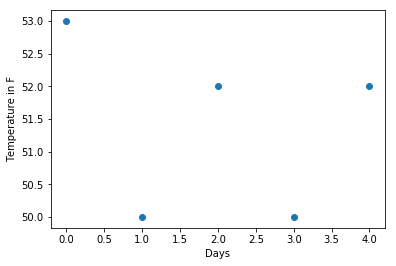

<Figure size 432x288 with 0 Axes>

In [ ]:
# data visualization with matplotlib
import matplotlib.pyplot as plt 
import numpy as np
plt.xlabel('Days')
plt.ylabel('Temperature in F')
x = [0,1,2,3,4]
y = highz
plt.scatter(x,y)
plt.show()
fig = plt.figure()


In [ ]:
short_desc = days.select(".short-desc")
short_desc

[<p class="short-desc">Chance<br/>Showers then<br/>Mostly Cloudy</p>,
 <p class="short-desc">Sunny then<br/>Sunny and<br/>Breezy</p>,
 <p class="short-desc">Clear</p>,
 <p class="short-desc">Sunny</p>,
 <p class="short-desc">Mostly Clear</p>,
 <p class="short-desc">Mostly Sunny<br/>then Mostly<br/>Sunny and<br/>Breezy</p>,
 <p class="short-desc">Partly Cloudy<br/>and Breezy<br/>then Partly<br/>Cloudy</p>,
 <p class="short-desc">Sunny</p>,
 <p class="short-desc">Clear</p>]

In [ ]:
lister(short_desc)

['ChanceShowers thenMostly Cloudy',
 'Sunny thenSunny andBreezy',
 'Clear',
 'Sunny',
 'Mostly Clear',
 'Mostly Sunnythen MostlySunny andBreezy',
 'Partly Cloudyand Breezythen PartlyCloudy',
 'Sunny',
 'Clear']

In [ ]:
# transfering data to a dataframe
import pandas as pd
# DataFrame() can take dictionaries
weather_df = pd.DataFrame({'Period':lister(period_tags),
                           "Temperature":temp_list,
                           "Description":lister(short_desc)
                          })
weather_df

,Period,Temperature,Description
0,Tonight,Low: 53 °F,ChanceShowers thenMostly Cloudy
1,Tuesday,High: 64 °F,Sunny thenSunny andBreezy
2,TuesdayNight,Low: 50 °F,Clear
3,Wednesday,High: 67 °F,Sunny
4,WednesdayNight,Low: 52 °F,Mostly Clear
5,Thursday,High: 64 °F,Mostly Sunnythen MostlySunny andBreezy
6,ThursdayNight,Low: 50 °F,Partly Cloudyand Breezythen PartlyCloudy
7,Friday,High: 66 °F,Sunny
8,FridayNight,Low: 52 °F,Clear
